In [1]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

C:\Users\20182366\AppData\Local\Temp\ipykernel_16080\1111087133.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


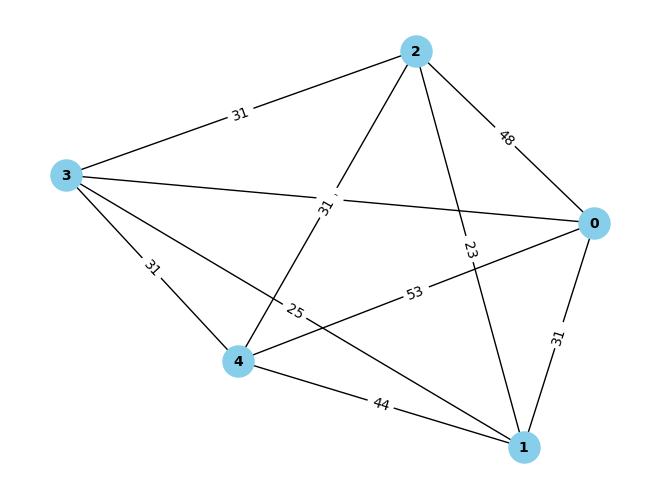

In [3]:
# Load adjacency matrix from CSV
adjacency_matrix_file = r'districting_2020\RI\counties\graph\RI_distances.csv'
adjacency_matrix_df = pd.read_csv(adjacency_matrix_file, index_col=0)

# Convert DataFrame to numpy array
adjacency_matrix = adjacency_matrix_df.to_numpy()

# Create a graph object
G = nx.from_numpy_array(adjacency_matrix)

# Draw the graph
pos = nx.spring_layout(G)  # Positions nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [4]:
RI_population = "districting_2020/RI/counties/graph/RI.population"

In [5]:
# Open the file and read its contents
with open(RI_population, 'r') as file:
    # Read the total population from the first line
    total_population_line = next(file).strip()  # Removes newline character at the end
    total_population = int(total_population_line.split('=')[1].strip())
    
    # Initialize a dictionary to store the rest of the data
    data = {}
    
    # Iterate over the remaining lines
    for line in file:
        # Each line is expected to have two values, separated by a space
        key, value = line.strip().split()  # Split by whitespace
        data[int(key)] = int(value)  # Convert both to integers and store in the dictionary

# Print the results to verify
total_population, data

(1097379, {0: 660741, 1: 50793, 2: 85643, 3: 170363, 4: 129839})

In [6]:
total_population/5

219475.8

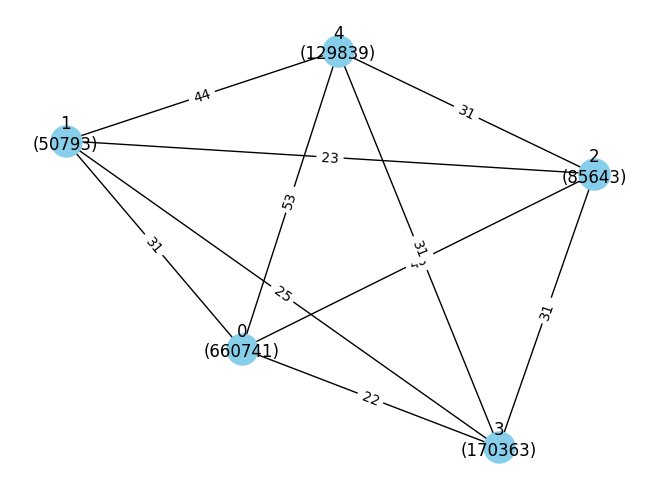

In [7]:
population_data: {0: 660741, 1: 50793, 2: 85643, 3: 170363, 4: 129839}
adjacency_matrix = adjacency_matrix_df.to_numpy()
G = nx.from_numpy_array(adjacency_matrix)
pos = nx.spring_layout(G)

# Your dictionary with the population data (replace this with your actual data)
population_data = {0: 660741, 1: 50793, 2: 85643, 3: 170363, 4: 129839}

# Update the labels with the population data
for node in G.nodes():
    G.nodes[node]['population'] = population_data[node]

# Draw the graph
nx.draw(G, pos, with_labels=False, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
label_pos = {k: [v[0], v[1] + 0.03] for k, v in pos.items()}  # This offsets the labels slightly above the nodes
labels = {node: f"{node}\n({G.nodes[node]['population']})" for node in G.nodes()}
nx.draw_networkx_labels(G, label_pos, labels=labels)

# Assuming you have edge weights you want to display
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

In [8]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np

In [9]:
# Model
m = gp.Model("district")
m

Restricted license - for non-production use only - expires 2025-11-24


<gurobi.Model Continuous instance district: 0 constrs, 0 vars, No parameter changes>

In [10]:
state = 'WA'
population = "districting_2020\\{}\\counties\\graph\\{}.population".format(state, state)
dimacs = "districting_2020\\{}\\counties\\graph\\{}.dimacs".format(state, state)

with open('Numberofdistricts.txt', 'r') as file:
    for line in file:
        parts = line.strip().split('\t')
        if parts[0] == state:
            num_districts = int(parts[1])


with open(population, "r") as file:
    # Skip the first line
    next(file)
    # Count the number of lines, each line represents a county
    num_counties = sum(1 for line in file)

num_districts


10

In [11]:
## Reading distances from file
filename = "districting_2020\\{}\\counties\\graph\\{}_distances.csv".format(state, state)
d = np.genfromtxt(filename, delimiter=',', skip_header=1)
d = d[:, 1:]

## Reading populations from file
with open(population, 'r') as file:
    # Read the total population from the first line
    total_population_line = next(file).strip()  # Removes newline character at the end
    total_population = int(total_population_line.split('=')[1].strip())
    
    # Initialize a dictionary to store the rest of the data
    p = {}
    
    # Iterate over the remaining lines
    for line in file:
        # Each line is expected to have two values, separated by a space
        key, value = line.strip().split()  # Split by whitespace
        p[int(key)] = int(value)  # Convert both to integers and store in the dictionary

## Reading neighbors from file
neighbors = set()
with open(dimacs, 'r') as f:
    lines = f.readlines()
    for line in lines:
        if line.startswith('e'):
            _, node1, node2 = line.split()
            node1 = int(node1)
            node2 = int(node2)
            if (node1, node2) not in neighbors and (node2, node1) not in neighbors:
                neighbors.add((node1, node2))

list(neighbors)

[(16, 20),
 (18, 35),
 (13, 17),
 (13, 26),
 (2, 32),
 (9, 28),
 (15, 16),
 (8, 32),
 (19, 32),
 (13, 28),
 (15, 25),
 (24, 28),
 (11, 37),
 (2, 34),
 (7, 30),
 (29, 36),
 (31, 33),
 (9, 12),
 (12, 29),
 (4, 34),
 (15, 18),
 (20, 35),
 (4, 18),
 (22, 32),
 (19, 36),
 (10, 33),
 (12, 24),
 (23, 24),
 (23, 33),
 (14, 30),
 (4, 38),
 (19, 29),
 (10, 26),
 (2, 22),
 (2, 31),
 (15, 34),
 (20, 30),
 (21, 29),
 (8, 31),
 (11, 36),
 (6, 15),
 (3, 7),
 (6, 33),
 (12, 28),
 (14, 25),
 (23, 28),
 (27, 28),
 (2, 8),
 (5, 34),
 (8, 33),
 (11, 29),
 (0, 38),
 (32, 36),
 (20, 25),
 (21, 24),
 (12, 21),
 (29, 37),
 (18, 34),
 (22, 34),
 (1, 11),
 (11, 22),
 (6, 10),
 (15, 31),
 (8, 19),
 (22, 36),
 (9, 27),
 (13, 27),
 (7, 20),
 (1, 34),
 (15, 33),
 (18, 20),
 (26, 33),
 (18, 38),
 (2, 5),
 (19, 21),
 (5, 31),
 (28, 33),
 (0, 35),
 (6, 14),
 (16, 25),
 (35, 38),
 (5, 15),
 (17, 26),
 (8, 23),
 (19, 23),
 (16, 18),
 (26, 28),
 (6, 25),
 (25, 30),
 (21, 23),
 (3, 20),
 (1, 22)]

In [12]:
adjacency_matrix_file = r"districting_2020\\2020\\{}\\counties\\graph\\{}_distances.csv".format(state, state)

# Set decision variable x for each node i whether it is in district j
x = {}
for i in range(num_counties):
    for j in range(num_districts):
        x[i, j] = m.addVar(vtype=gp.GRB.BINARY, name="x_{}_{}".format(i, j))

## Set decision variable y for each edge in neighbors, between nodes i and k, for each district j
y = {}
for i, k in neighbors:
    for j in range(num_districts):
        y[i, k, j] = m.addVar(vtype=gp.GRB.BINARY, name="y_{}_{}_{}".format(i, k, j))

# for i in range(num_counties):
#     for k in range(num_counties):
#         for j in range(num_districts):
#             y[i, k, j] = m.addVar(vtype=gp.GRB.BINARY, name="y_{}_{}_{}".format(i, k, j))

# Set slack variable
slack = {}
for j in range(num_districts):
    slack[j] = m.addVar(obj=1, name="slack")




alpha = 0.1  # Weight of the balanced weight term
y


{(16, 20, 0): <gurobi.Var *Awaiting Model Update*>,
 (16, 20, 1): <gurobi.Var *Awaiting Model Update*>,
 (16, 20, 2): <gurobi.Var *Awaiting Model Update*>,
 (16, 20, 3): <gurobi.Var *Awaiting Model Update*>,
 (16, 20, 4): <gurobi.Var *Awaiting Model Update*>,
 (16, 20, 5): <gurobi.Var *Awaiting Model Update*>,
 (16, 20, 6): <gurobi.Var *Awaiting Model Update*>,
 (16, 20, 7): <gurobi.Var *Awaiting Model Update*>,
 (16, 20, 8): <gurobi.Var *Awaiting Model Update*>,
 (16, 20, 9): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 0): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 1): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 2): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 3): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 4): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 5): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 6): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 7): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 8): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 9)

In [13]:
# Set objective function
m.setObjective(-gp.quicksum(y[i, k, j] * d[i, k] for i, k in neighbors for j in range(num_districts)) \
             + alpha * (gp.quicksum(slack[j] for j in range(num_districts))), gp.GRB.MINIMIZE)


In [14]:

# Each edge in neighbors is assigned to exactly one district
for i, k in neighbors:
    for j in range(num_districts):
        m.addConstr(x[i, j] + x[k, j] >= 2 * y[i, k, j] )
        m.addConstr(x[i, j] + x[k, j] <= 1 + y[i, k, j])

# Add population constraint with slack variable
for j in range(num_districts):
    m.addConstr(gp.quicksum(x[i, j] * p[i] for i in range(num_counties)) >= ((total_population / num_districts) - slack[j]))
    m.addConstr(gp.quicksum(x[i, j] * p[i] for i in range(num_counties)) <= ((total_population / num_districts) + slack[j]))

# Each county is assigned to exactly one district
for i in range(num_counties):
    m.addConstr(gp.quicksum(x[i, j] for j in range(num_districts)) == 1)

for j in range(num_districts):
    m.addConstr(gp.quicksum(x[i, j] for i in range(num_counties)) >= 1)


In [15]:
# Write LP formulation to a file
m.write("districts.lp")

# Read the LP formulation from the file
with open("districts.lp", "r") as f:
    lp_formulation = f.read()

# Print LP formulation
print("LP Formulation:")
print(lp_formulation)

# Solve
m.optimize()

LP Formulation:
\ Model district
\ LP format - for model browsing. Use MPS format to capture full model detail.
Minimize
  - 80 y_16_20_0 - 80 y_16_20_1 - 80 y_16_20_2 - 80 y_16_20_3 - 80 y_16_20_4
   - 80 y_16_20_5 - 80 y_16_20_6 - 80 y_16_20_7 - 80 y_16_20_8
   - 80 y_16_20_9 - 76 y_18_35_0 - 76 y_18_35_1 - 76 y_18_35_2
   - 76 y_18_35_3 - 76 y_18_35_4 - 76 y_18_35_5 - 76 y_18_35_6
   - 76 y_18_35_7 - 76 y_18_35_8 - 76 y_18_35_9 - 49 y_13_17_0
   - 49 y_13_17_1 - 49 y_13_17_2 - 49 y_13_17_3 - 49 y_13_17_4
   - 49 y_13_17_5 - 49 y_13_17_6 - 49 y_13_17_7 - 49 y_13_17_8
   - 49 y_13_17_9 - 62 y_13_26_0 - 62 y_13_26_1 - 62 y_13_26_2
   - 62 y_13_26_3 - 62 y_13_26_4 - 62 y_13_26_5 - 62 y_13_26_6
   - 62 y_13_26_7 - 62 y_13_26_8 - 62 y_13_26_9 - 85 y_2_32_0 - 85 y_2_32_1
   - 85 y_2_32_2 - 85 y_2_32_3 - 85 y_2_32_4 - 85 y_2_32_5 - 85 y_2_32_6
   - 85 y_2_32_7 - 85 y_2_32_8 - 85 y_2_32_9 - 106 y_9_28_0 - 106 y_9_28_1
   - 106 y_9_28_2 - 106 y_9_28_3 - 106 y_9_28_4 - 106 y_9_28_5
   - 106 y_

In [ ]:
def printSolution():
    if m.status == GRB.OPTIMAL:
        print('\nObjective Value: %g' % m.ObjVal)
        for i in range(num_counties):
            for j in range(num_districts):
                print("x_{}_{} = {}".format(i, j, x[i, j].X))
        for j in range(num_districts):
            print("slack_{} = {}".format(j, slack[j].X))
    else:
        print('No solution')

printSolution()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

path_to_visualize = r"districting_2020\\{}\\counties\\maps\\{}_counties.shp".format(state, state)
# Load the shapefile
counties_gdf = gpd.read_file(path_to_visualize)


counties_gdf.plot(column='NAME20', legend = True)
plt.show()


In [ ]:
def get_district_counties():
    # Initialize a dictionary to hold counties for each district
    district_counties = {j: set() for j in range(num_districts)}

    # Iterate over x variables to find counties assigned to each district
    for i in range(num_counties):
        for j in range(num_districts):
            if x[i, j].X > 0.5:  # County is part of the district
                district_counties[j].add(i)
    
    return district_counties

# Assuming the model has been optimized
if m.status == GRB.OPTIMAL:
    district_counties = get_district_counties()
    for j, counties in district_counties.items():
        print(f"District {j} contains counties: {counties}")
else:
    print("No solution")


In [ ]:
population = r"districting_2020\\{}\\counties\\graph\\{}.population".format(state, state)
# Open the file and read its contents
with open(population, 'r') as file:
    # Read the total population from the first line
    total_population_line = next(file).strip()  # Removes newline character at the end
    total_population = int(total_population_line.split('=')[1].strip())
    
    # Initialize a dictionary to store the rest of the data
    data = {}
    
    # Iterate over the remaining lines
    for line in file:
        # Each line is expected to have two values, separated by a space
        key, value = line.strip().split()  # Split by whitespace
        data[int(key)] = int(value)  # Convert both to integers and store in the dictionary

# Print the results to verify
total_population, data

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Patch

# ... your code for loading the shapefile and setting up the GeoDataFrame ...

# Assuming 'data' and 'district_counties' are defined as mentioned earlier
# and 'district_population' is already calculated using that data

# Normalize the district values to match the color range
num_districts = len(counties_gdf['district'].unique())
cmap = plt.cm.get_cmap('twilight', num_districts)  # Replace 'viridis' with your colormap
norm = Normalize(vmin=0, vmax=num_districts - 1)  # Assuming district values start from 0

# Plot the GeoDataFrame with the colormap
fig, ax = plt.subplots(figsize=(10, 10))
# Do not display the automatic legend by setting legend=False
counties_gdf.plot(column='district', ax=ax, cmap=cmap, norm=norm, legend=False)

# Annotate each county with its population
for idx, row in counties_gdf.iterrows():
    centroid = row['geometry'].centroid
    # Format the population number with thousand separators as periods
    formatted_population = "{:,}".format(row['population']).replace(",", ".")
    plt.annotate(text=formatted_population, xy=(centroid.x, centroid.y), xytext=(-15, -10), textcoords="offset points")

# Create a scalar mappable object to assist with mapping district numbers to colors
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set the array to empty since we are using the ScalarMappable only for coloring

# Creating a custom legend for total population by district
# Make sure to sort the districts in the same order as they appear in the plot
sorted_districts = sorted(district_population.keys(), key=int)  # Sorting by district number, adjust as needed
legend_elements = [Patch(facecolor=sm.to_rgba(district), edgecolor='k',
                         label='District {}: Pop. {:,.0f}'.format(district, district_population[district]).replace(',', '.'))
                   for district in sorted_districts]

# Add the custom legend to the plot, outside the plot area
ax.legend(handles=legend_elements, title='Total Population by District', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
